In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent lineage
G.add_node("Grandparent")
G.add_node("Parent1")
G.add_node("Parent2")
G.add_node("Child")

G.add_edges_from([("Grandparent", "Parent1"), ("Grandparent", "Parent2"), ("Parent1", "Child"), ("Parent2", "Child")])

# Draw the graph
pos = nx.graphviz_layout(G)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue")
plt.show()

AttributeError: module 'networkx' has no attribute 'graphviz_layout'

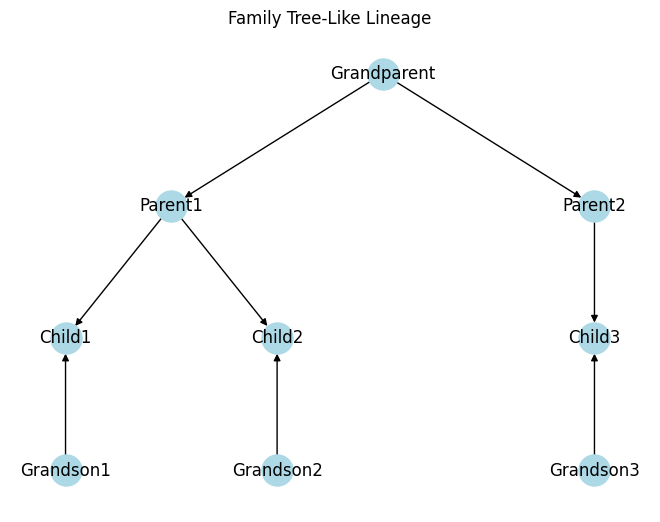

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing lineage
G = nx.DiGraph()
G.add_edges_from([
    ('Grandparent', 'Parent1'),
    ('Grandparent', 'Parent2'),
    ('Parent1', 'Child1'),
    ('Parent1', 'Child2'),
    ('Parent2', 'Child3'),
    ('Grandson1', 'Child1'),
    ('Grandson2', 'Child2'),
    ('Grandson3', 'Child3'),
])

# Define custom node positions for a family tree-like layout
pos = {
    'Grandparent': (0, 0),
    'Parent1': (-1, -1),
    'Parent2': (1, -1),
    'Child1': (-1.5, -2),
    'Child2': (-0.5, -2),
    'Child3': (1, -2),
    'Grandson1': (-1.5, -3),
    'Grandson2': (-0.5, -3),
    'Grandson3': (1, -3),
}

# Draw the lineage graph using the custom layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', arrows=True)
plt.title('Family Tree-Like Lineage')
plt.show()


In [285]:
excel_path = "/Users/sherryyang/Documents/wiggins-lab/data/manually_linked.xlsx"

In [286]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
excel_file = pd.ExcelFile(excel_path)

# Get a list of sheet names in the Excel file
sheet_names = excel_file.sheet_names

In [287]:
import networkx as nx
G = nx.Graph()
pos = {}

In [288]:
# Setup process
original_cell_index = 0
generation_dic = {}
G = nx.Graph()
pos = {}

df = excel_file.parse('t1-t2')
df = df.astype(str)
columns = df.columns
for index, row in df.iterrows():
    label1 = row[columns[0]] + columns[0]
    pos[label1] = (index,0)
    generation_dic[label1] = 1
    original_cell_index = index

# Normal process
for time_sheet in sheet_names:
        df = excel_file.parse(time_sheet)
        df = df.astype(str)
        columns = df.columns
        for index, row in df.iterrows():
            if ',' in row[columns[1]]:
                label1 = row[columns[0]] + columns[0]
                value = generation_dic[label1]
                (position, level) = pos[label1]
                
                cell_list = row[columns[1]].split(',')
                for index, cell in enumerate(cell_list):
                    label = cell + columns[1]
                    leftboundry = position - 1/(2*value)
                    offeset = 1/(value * len(cell_list)) * index + 1/(value * len(cell_list) * 2) 
                    pos[label] = (leftboundry + offeset,level-1)
                    generation_dic[label] = value * len(cell_list)
                    G.add_edge(label1, label)
            else:
                label1 = row[columns[0]] + columns[0]
                label2 = row[columns[1]] + columns[1]
                (position, level) = pos[label1]
                value = generation_dic[label1]
                pos[label2] = (position,level-1)
                generation_dic[label2] = value
                G.add_edge(label1, label2)


KeyError: '85t28'

In [132]:
df = excel_file.parse('t9-t10')

In [271]:
labels = {node: node[:-2] for node in G.nodes()}

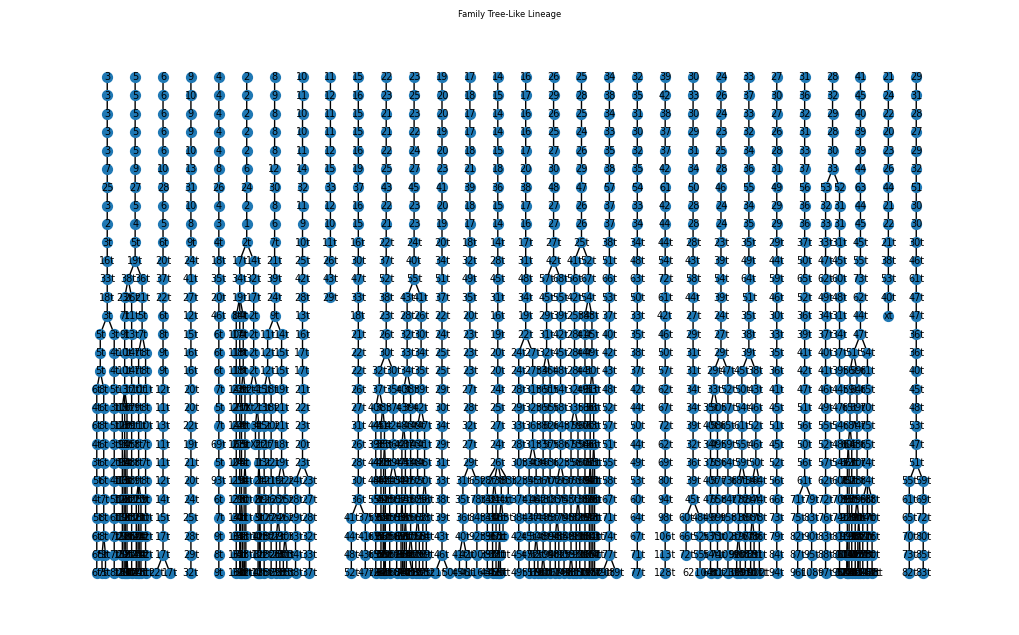

In [284]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the figure size to make the diagram larger (adjust width and height as needed)
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Draw the graph
nx.draw(G, pos, with_labels=True, edge_color="black", labels=labels, node_size=50, arrows=True, font_size=7)

plt.title('Family Tree-Like Lineage')
plt.show()

In [ ]:
pos = {
    'Grandparent': (0, 0),
    'Parent1': (-1, -1),
    'Parent2': (1, -1),
    'Child1': (-1.5, -2),
    'Child2': (-0.5, -2),
    'Child3': (1, -2),
    'Grandson1': (-1.5, -3),
    'Grandson2': (-0.5, -3),
    'Grandson3': (1, -3),
}

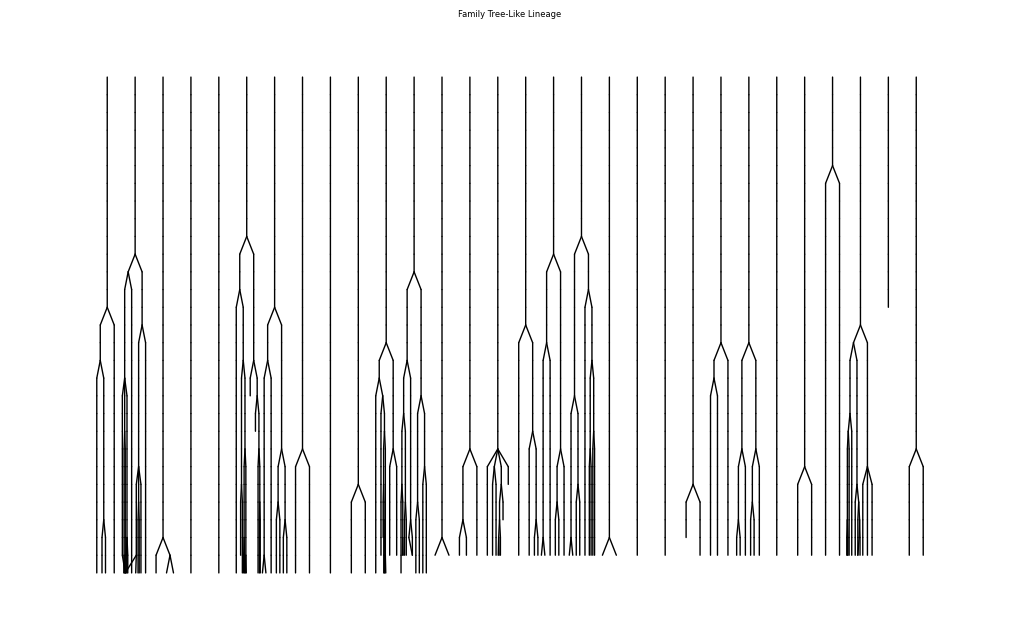

In [289]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the figure size to make the diagram larger (adjust width and height as needed)
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Draw the graph
nx.draw(G, pos, with_labels=False, edge_color="black", labels=labels, node_size=0, arrows=True)

plt.title('Family Tree-Like Lineage')
plt.show()